# OpenStreetMap Integration

This notebook is a simple proof of concept to make use of OpenStreetMaps using the python library [osmnx](https://github.com/gboeing/osmnx-examples).



In [1]:
import pandas as pd  
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.__version__

'1.6.0'

/Users/abditus/miniconda3/envs/equitable-polling-locations/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/abditus/miniconda3/envs/equitable-polling-locations/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/abditus/miniconda3/envs/equitable-polling-locations/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/abditus/miniconda3/envs/equitable-polling-locations/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/abditus/miniconda3/envs/equitable-polling-locations/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.

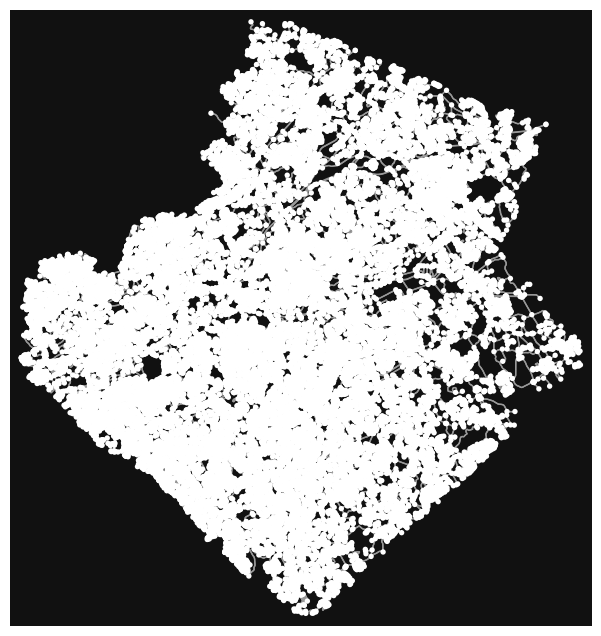

In [6]:
LOCATION = 'Gwinnett, Georgia, USA'


# download/model a street network for some city then visualize it
# Note this will print out a bunch of RuntimeWarning messages, they can be ignored
# G = ox.graph_from_place({'state':'Georgia'}, network_type="drive")
# G = ox.geocode_to_gdf(LOCATION)
G = ox.graph_from_place(LOCATION, network_type="drive")
fig, ax = ox.plot_graph(G)

In [7]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

In [ ]:
SOURCE_FILE = 'datasets/Gwinett_GA.csv'

df = pd.read_csv(
    SOURCE_FILE,
    header=[0,1], # DHC files have two headers rows when exported to CSV - tell pandas to take top one
    low_memory=False, # files are too big, set this to False to prevent errors
    nrows=10, # limit rows loaded - testing purposes only
)
df

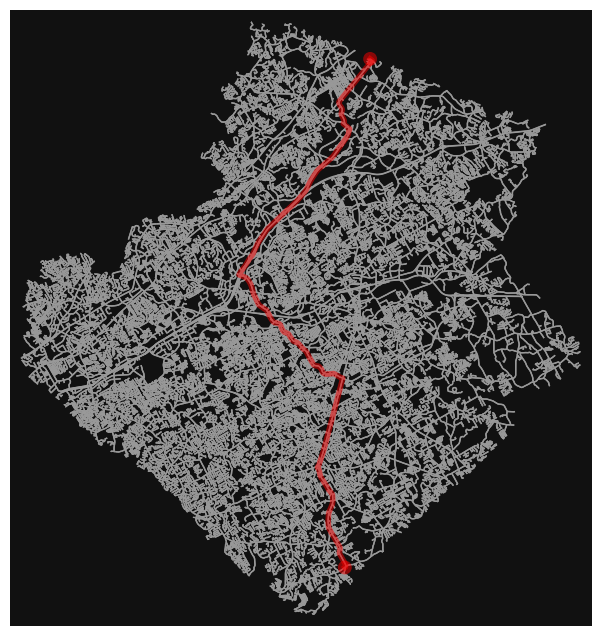

In [8]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=-83.976393, Y=34.135637)
dest = ox.distance.nearest_nodes(G, X=-84.00129, Y=33.78823)

route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [9]:
# how long is our route in meters?
edge_lengths = ox.utils_graph.route_to_gdf(G, route)["length"]
round(sum(edge_lengths))

48050